# EDA Project: Online Shopping Behavior


This notebook explores the online shopping behavior dataset, performs data cleaning, and derives insights to understand user behavior.

In [150]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")


## Load Dataset

In [151]:

df = pd.read_csv(r"C:\Users\Hrishikesh\Downloads\online_shopping_behavior.csv")
df.head()


,User_ID,Age,Gender,Country,Session_Duration,Pages_Visited,Product_Category,Purchase_Intent,Purchase_Amount,Device_Type,Signup_Date,Last_Login
0,U1000,34.0,male,India,8.712084,4,Home Decor,Yes,884.30,mobile,10-02-2024,28-12-2024
1,U1001,60.0,FeMale,NaN,4.350136,7,NaN,no,NaN,Tablet,09-06-2023,30-06-2024
2,U1002,50.0,FEMALE,Canada,0.310357,2,Clothes,yes,1130.35,MOBILE,22-04-2024,07-01-2025
3,U1003,44.0,FEMALE,Canada,19.063931,4,Electronics,No,0.00,MOBILE,NaN,22-09-2024
4,U1004,24.0,FeMale,NaN,6.173067,5,Groceries,NO,NaN,Mobile,01-09-2023,23-11-2024


## Dataset Overview

In [152]:

df.shape


(550, 12)

In [153]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           550 non-null    object 
 1   Age               539 non-null    float64
 2   Gender            533 non-null    object 
 3   Country           517 non-null    object 
 4   Session_Duration  520 non-null    float64
 5   Pages_Visited     550 non-null    int64  
 6   Product_Category  480 non-null    object 
 7   Purchase_Intent   519 non-null    object 
 8   Purchase_Amount   479 non-null    float64
 9   Device_Type       463 non-null    object 
 10  Signup_Date       519 non-null    object 
 11  Last_Login        498 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 51.7+ KB


In [154]:

df.describe(include='all')


,User_ID,Age,Gender,Country,Session_Duration,Pages_Visited,Product_Category,Purchase_Intent,Purchase_Amount,Device_Type,Signup_Date,Last_Login
count,550,539.000000,533,517,520.000000,550.000000,480,519,479.000000,463,519,498
unique,550,NaN,6,6,NaN,NaN,7,6,NaN,6,375,267
top,U1000,NaN,Male,India,NaN,NaN,Home Decor,Yes,NaN,Mobile,08-03-2024,02-01-2025
freq,1,NaN,185,110,NaN,NaN,80,148,NaN,92,5,6
mean,NaN,38.974026,NaN,NaN,15.401173,3.956364,NaN,NaN,624.743069,NaN,NaN,NaN
std,NaN,17.005009,NaN,NaN,7.929615,2.002254,NaN,NaN,530.265048,NaN,NaN,NaN
min,NaN,-1.000000,NaN,NaN,-5.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,27.000000,NaN,NaN,10.123361,3.000000,NaN,NaN,0.000000,NaN,NaN,NaN
50%,NaN,40.000000,NaN,NaN,15.302426,4.000000,NaN,NaN,746.700000,NaN,NaN,NaN
75%,NaN,50.000000,NaN,NaN,20.687193,5.000000,NaN,NaN,1053.260000,NaN,NaN,NaN


Countplot - Frequency Distribution of a Single Categorical or Discrete Variable
Histogram - Frequency Distribution of a Single Continuous Numeric Variable
Boxplot - Frequency Distribution of a Single Continuous numeric variable along with additional info about central tendency and outliersrs
Barplot - To understand relation between 1 Categorical and 1 Numerical Feature
Scatterplot - 2 Continuous Numeric Features
Boxplot - To understand relation between 1 Continuous and 1 Categorical Feature

# Data Pre-Processing

## Missing Values Analysis

In [155]:

df.isnull().sum().sort_values(ascending=False)


Device_Type         87
Purchase_Amount     71
Product_Category    70
Last_Login          52
Country             33
Purchase_Intent     31
Signup_Date         31
Session_Duration    30
Gender              17
Age                 11
User_ID              0
Pages_Visited        0
dtype: int64

## Data Cleaning

In [156]:

df['Age'] = df['Age'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df['Age'].fillna(df['Age'].median(), inplace=True)


In [157]:
df.Age.mean()

39.163636363636364

In [158]:
df.Age.median()

40.0

**Inference:** We can say that the average age of people visiting our website for online shopping is around 39-40 years of age. This can be seen very consistently across the entire dataset.

In [159]:
df.Gender.value_counts()

Gender
Male      185
male      133
FEMALE     83
FeMale     50
Female     48
femle      34
Name: count, dtype: int64

In [160]:

df['Gender'] = df['Gender'].str.lower().str.strip()
df['Gender'] = df['Gender'].replace({'femle': 'female', 'feMale': 'female'})


In [161]:
df['Product_Category'].value_counts()

Product_Category
Home Decor     80
Clothes        74
Groceries      72
electronic     68
Electronics    64
cloths         63
Books          59
Name: count, dtype: int64

In [162]:

df['Product_Category'] = df['Product_Category'].str.lower().str.strip()
df['Product_Category'] = df['Product_Category'].replace({'cloths': 'clothes', 'electronic': 'electronics'})


In [163]:
df['Device_Type'].value_counts()

Device_Type
Mobile     92
Tab        78
mobile     75
Tablet     73
Desktop    73
MOBILE     72
Name: count, dtype: int64

In [164]:

df['Device_Type'] = df['Device_Type'].str.lower().str.strip()
df['Device_Type'] = df['Device_Type'].replace({'tab': 'tablet'})


In [165]:
df['Purchase_Intent'].value_counts()

Purchase_Intent
Yes    148
No     129
yes    109
NO      54
YES     51
no      28
Name: count, dtype: int64

In [166]:
df['Purchase_Amount'].value_counts()

Purchase_Amount
0.00       171
1052.55      2
1182.95      1
482.52       1
1179.50      1
          ... 
922.71       1
869.15       1
585.82       1
1245.05      1
958.63       1
Name: count, Length: 308, dtype: int64

In [167]:

df['Purchase_Intent'] = df['Purchase_Intent'].str.lower().str.strip()
df['Purchase_Amount'] = df.apply(lambda x: 0 if x['Purchase_Intent'] == 'no' else x['Purchase_Amount'], axis=1)


In [168]:
df[df['Session_Duration']<0].value_counts()

User_ID  Age   Gender  Country  Session_Duration  Pages_Visited  Product_Category  Purchase_Intent  Purchase_Amount  Device_Type  Signup_Date  Last_Login
U1005    24.0  male    India    -2.223125         5              home decor        yes              724.85           mobile       07-04-2024   04-04-2025    1
U1041    40.0  female  USA      -0.803733         7              clothes           no               0.00             tablet       08-10-2023   01-07-2024    1
U1141    29.0  male    UK       -0.730853         9              clothes           yes              533.39           mobile       29-09-2023   29-10-2024    1
U1255    42.0  female  Canada   -5.000000         3              electronics       yes              833.89           desktop      01-04-2024   03-01-2025    1
U1278    49.0  female  USA      -4.393922         5              electronics       yes              987.61           mobile       12-12-2023   01-07-2024    1
U1428    33.0  male    UK       -2.381356         4

In [169]:

df['Session_Duration'] = df['Session_Duration'].apply(lambda x: np.nan if x < 0 else x)
df['Session_Duration'].fillna(df['Session_Duration'].median(), inplace=True)


In [170]:

df['Signup_Date'] = pd.to_datetime(df['Signup_Date'], errors='coerce')
df['Last_Login'] = pd.to_datetime(df['Last_Login'], errors='coerce')


In [171]:
df.isnull().sum()

User_ID               0
Age                   0
Gender               17
Country              33
Session_Duration      0
Pages_Visited         0
Product_Category     70
Purchase_Intent      31
Purchase_Amount       6
Device_Type          87
Signup_Date         364
Last_Login           52
dtype: int64

In [172]:
df['Gender'].value_counts()

Gender
male      318
female    215
Name: count, dtype: int64

In [173]:
df['Country'].value_counts()

Country
India      110
USA         99
Brazil      97
UK          80
Germany     78
Canada      53
Name: count, dtype: int64

In [174]:
df['Product_Category'].value_counts()

Product_Category
clothes        137
electronics    132
home decor      80
groceries       72
books           59
Name: count, dtype: int64

In [175]:
df['Purchase_Intent'].value_counts()

Purchase_Intent
yes    308
no     211
Name: count, dtype: int64

In [176]:
df['Device_Type'].value_counts()

Device_Type
mobile     239
tablet     151
desktop     73
Name: count, dtype: int64

In [177]:
df['Gender'] = df['Gender'].fillna("female")
df['Country'] = df['Country'].fillna("India")
df['Product_Category'] = df['Product_Category'].fillna('Miscellaneous')
df['Purchase_Intent'] = df['Purchase_Intent'].fillna('no')
df['Purchase_Amount'] = df['Purchase_Amount'].fillna(0)
df['Device_Type'] = df['Device_Type'].fillna(df['Device_Type'].mode()[0])
df.isnull().sum()

User_ID               0
Age                   0
Gender                0
Country               0
Session_Duration      0
Pages_Visited         0
Product_Category      0
Purchase_Intent       0
Purchase_Amount       0
Device_Type           0
Signup_Date         364
Last_Login           52
dtype: int64

# Visualisations and Insights = EDA

## Univariate Analysis

#### Understanding the Distribution of age.

In [178]:
df.describe()

,Age,Session_Duration,Pages_Visited,Purchase_Amount,Signup_Date,Last_Login
count,550.000000,550.000000,550.000000,550.000000,186,498
mean,39.163636,15.884561,3.956364,544.094418,2023-08-09 20:38:42.580645120,2024-12-01 15:31:05.060240896
min,18.000000,0.067707,0.000000,0.000000,2022-01-08 00:00:00,2024-06-01 00:00:00
25%,29.000000,11.289588,3.000000,0.000000,2023-02-01 06:00:00,2024-08-26 12:00:00
50%,40.000000,15.551631,4.000000,593.305000,2023-08-02 12:00:00,2024-11-30 12:00:00
75%,49.000000,20.353803,5.000000,1009.982500,2024-05-03 18:00:00,2025-03-12 18:00:00
max,60.000000,40.544861,10.000000,1880.700000,2024-12-03 00:00:00,2025-06-01 00:00:00
std,12.479730,7.098303,2.002254,537.380126,NaN,NaN


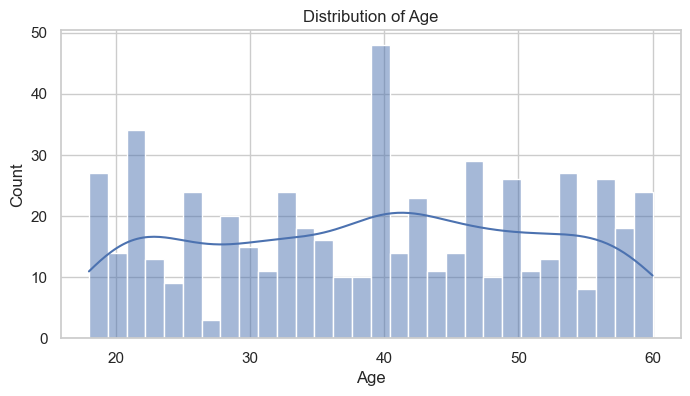

In [179]:

plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Distribution of Age")
plt.show()


**Inference:** We can see that most of the people that are visiting the website are between the ages of 35-45.  

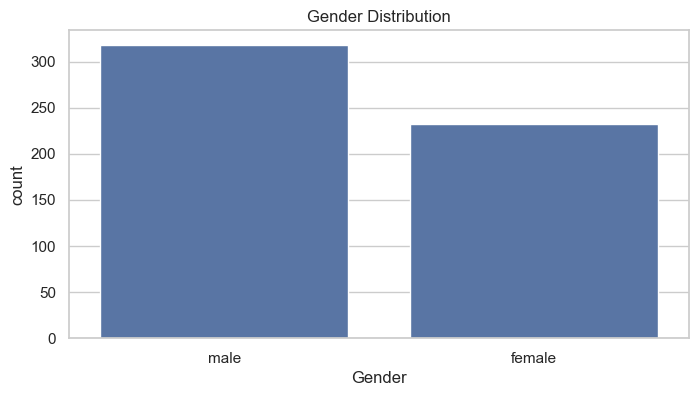

In [180]:

plt.figure(figsize=(8, 4))
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()


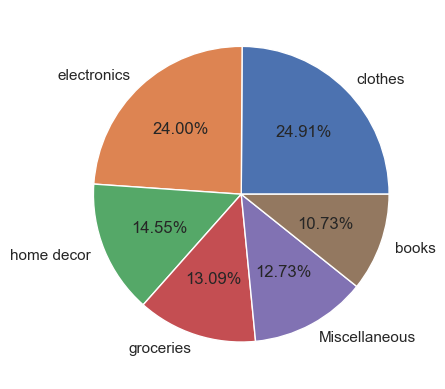

In [181]:
category_counts = df['Product_Category'].value_counts()
plt.pie(category_counts,autopct='%.2f%%',labels=category_counts.index);

## Bivariate Analysis

In [182]:
pd.crosstab(df['Gender'], df['Purchase_Intent'])

Purchase_Intent,no,yes
Gender,,
female,102,130
male,140,178


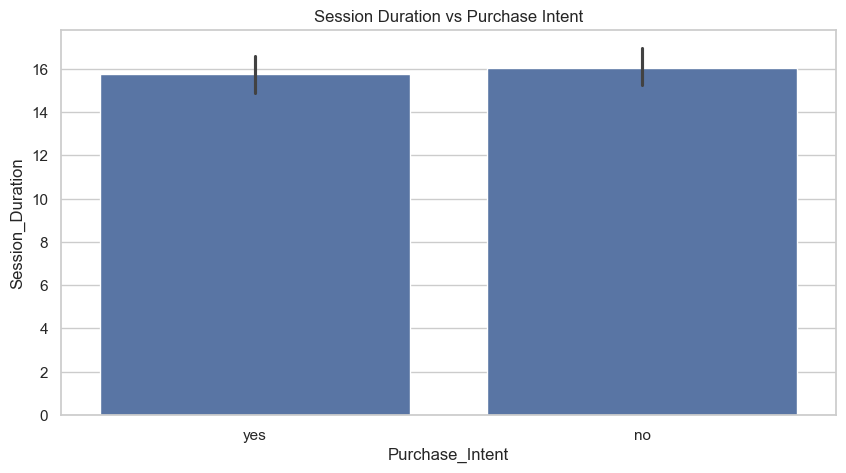

In [183]:

plt.figure(figsize=(10, 5))
sns.barplot(x='Purchase_Intent', y='Session_Duration', data=df)
plt.title("Session Duration vs Purchase Intent")
plt.show()


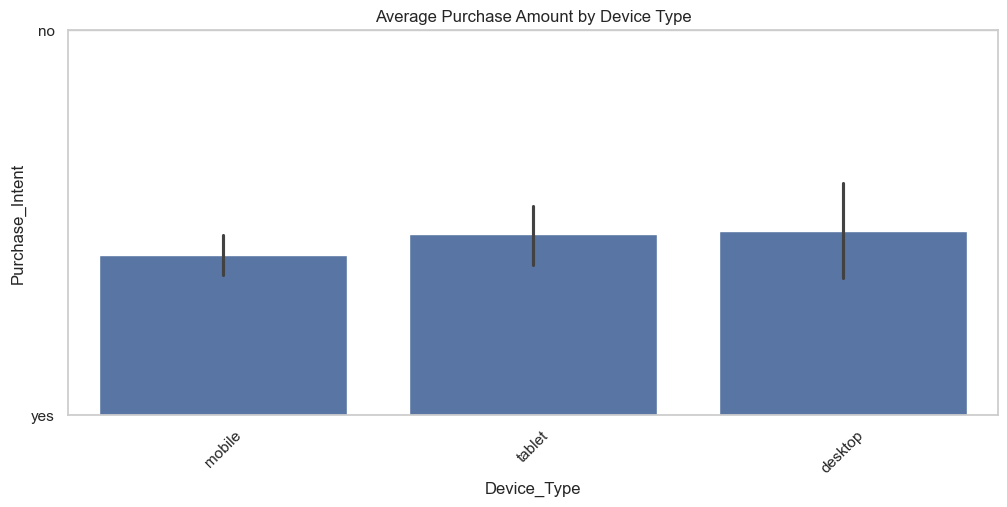

In [184]:

plt.figure(figsize=(12, 5))
sns.barplot(x='Device_Type', y='Purchase_Intent', data=df)
plt.ylim(0,1)
plt.title("Average Purchase Amount by Device Type")
plt.xticks(rotation=45)
plt.show()


## Correlation Heatmap

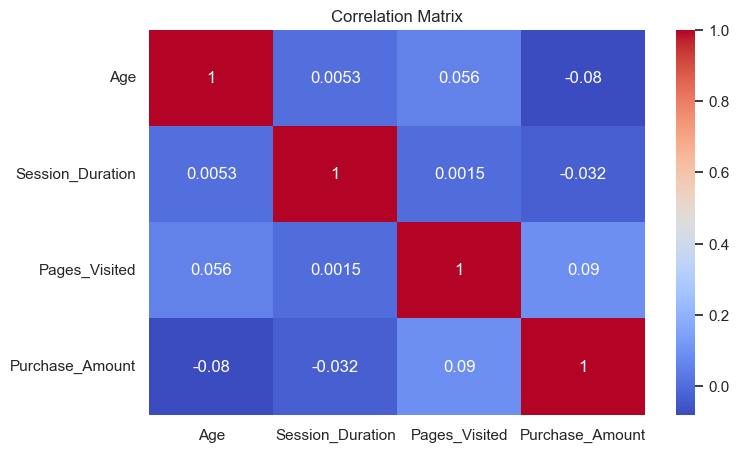

In [35]:

plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## 1. Who is our user base? (Demographics, behavior patterns)
## 2. What makes people convert (buy)?
## 3. Which factors increase spending?
## 4. What devices are most valuable to our business?
## 5. Are there differences between genders, age groups, or regions in purchase intent or amount?
## 6. Is our marketing equally effective across different segments?
## 7. Correlation Analysis (Multivariate)

## 1. Who is our user base? (Demographics, behavior patterns)

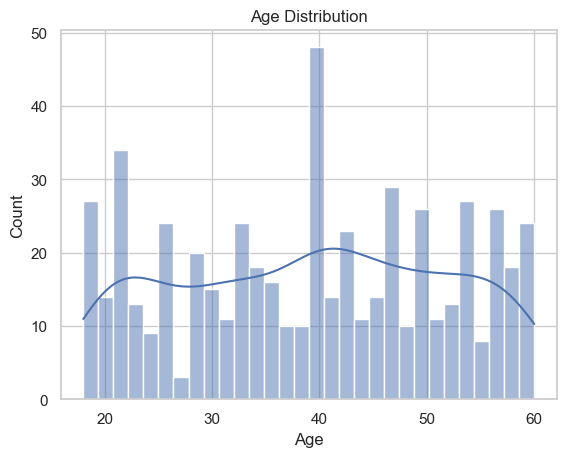

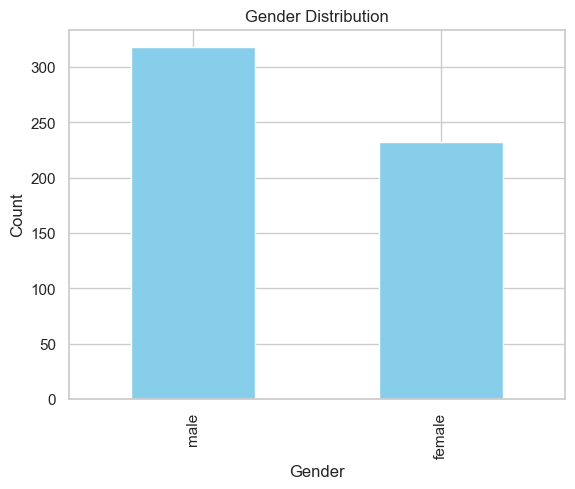

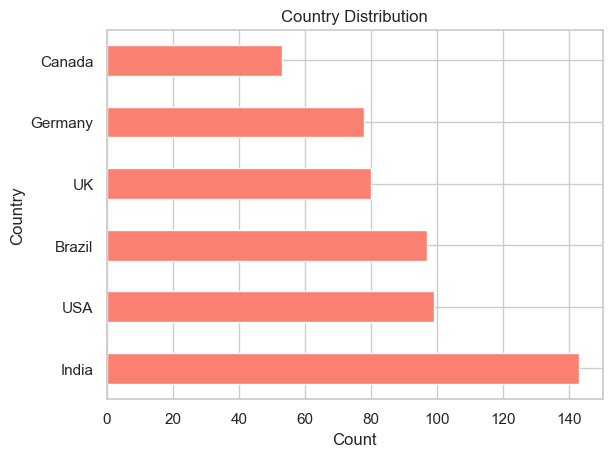

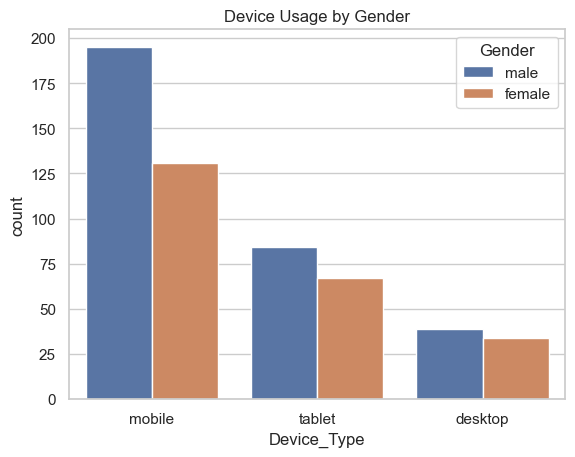

In [185]:
# Age distribution
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Gender distribution
df['Gender'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.show()

# Country distribution
df['Country'].value_counts().plot(kind='barh', color='salmon')
plt.title('Country Distribution')
plt.xlabel('Count')
plt.show()

# Device usage by Gender
sns.countplot(x='Device_Type', hue='Gender', data=df)
plt.title('Device Usage by Gender')
plt.show()

## 2. What makes people convert (buy)?

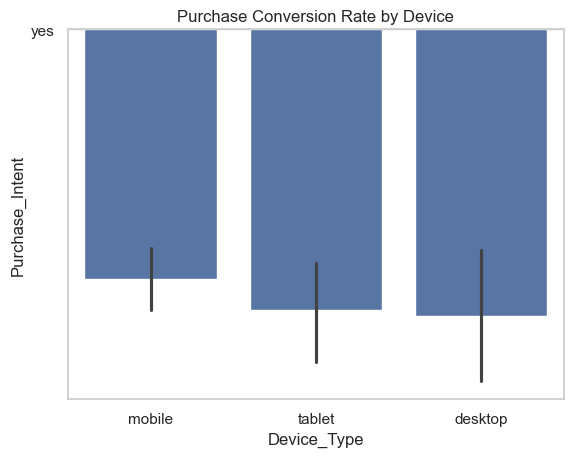

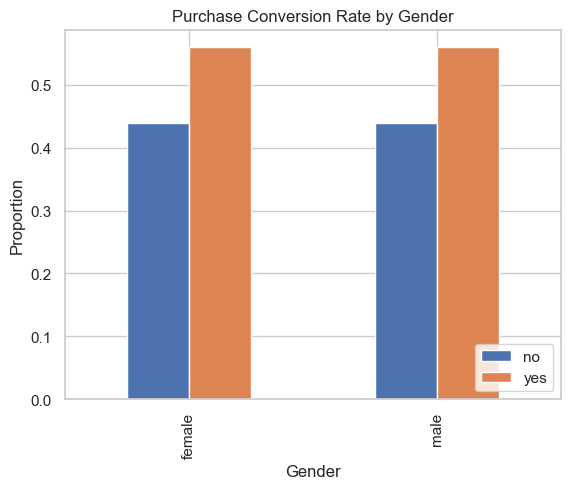

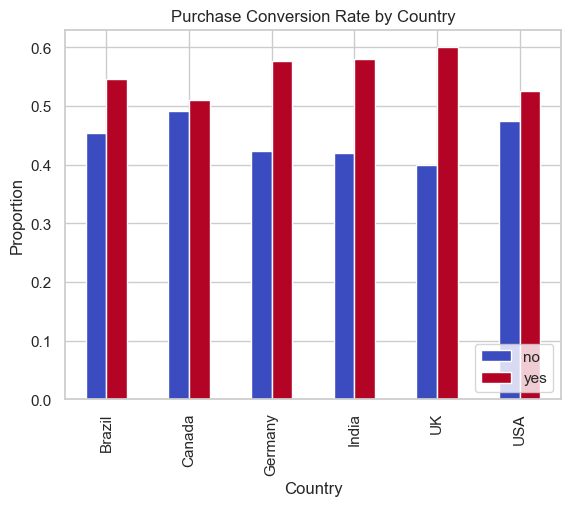

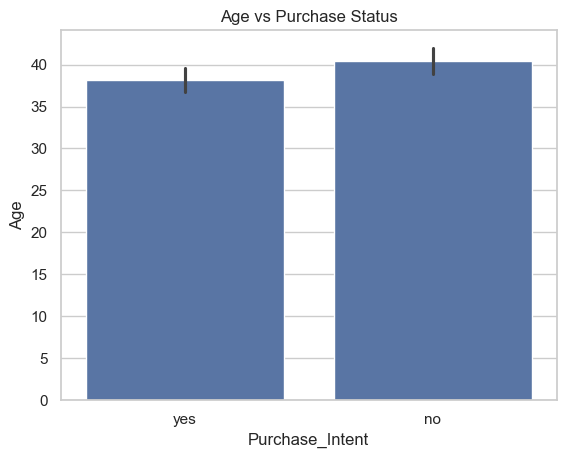

In [194]:
# Conversion by Device
sns.barplot(x='Device_Type', y='Purchase_Intent', data=df, estimator=np.mean)
# plt.ylim(0, 1)
plt.title('Purchase Conversion Rate by Device')
plt.show()

# Conversion by Gender (Crosstab)
pd.crosstab(df['Gender'], df['Purchase_Intent'], normalize='index').plot(kind='bar', stacked=False)
plt.legend(loc='lower right')
plt.title('Purchase Conversion Rate by Gender')
plt.ylabel('Proportion')
plt.show();

# Conversion by Region
pd.crosstab(df['Country'], df['Purchase_Intent'], normalize='index').plot(kind='bar', stacked=False, colormap='coolwarm')
plt.title('Purchase Conversion Rate by Country')
plt.ylabel('Proportion')
plt.legend(loc='lower right')
plt.show();

# Age difference between buyers and non-buyers
sns.barplot(x='Purchase_Intent', y='Age', data=df)
plt.title('Age vs Purchase Status')
plt.show();

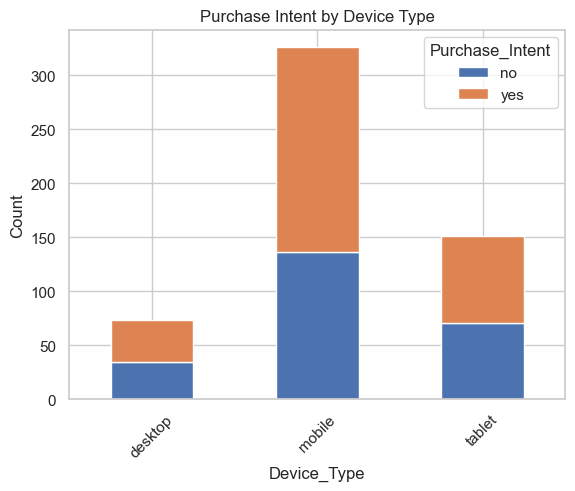

In [38]:
pd.crosstab(df['Device_Type'], df['Purchase_Intent']).plot(kind='bar', stacked=True)
plt.title("Purchase Intent by Device Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## 3. Which factors increase spending?

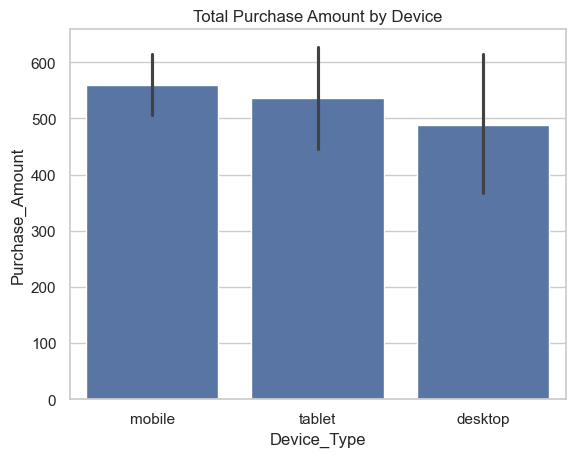

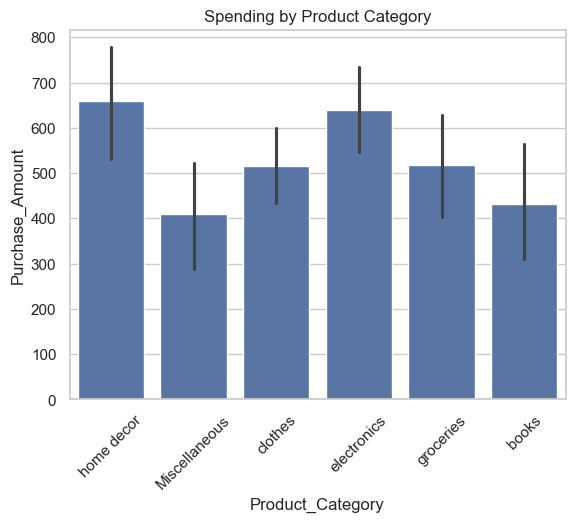

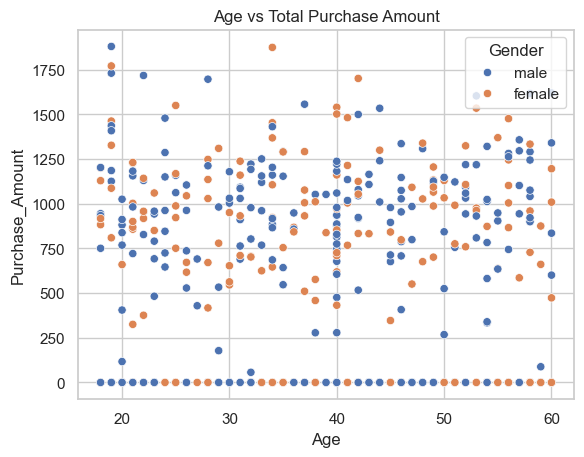

In [195]:
# Spending by Device
sns.barplot(x='Device_Type', y='Purchase_Amount', data=df)
plt.title('Total Purchase Amount by Device')
plt.show()

# Spending by Product Category
sns.barplot(x='Product_Category', y='Purchase_Amount', data=df)
plt.title('Spending by Product Category')
plt.xticks(rotation=45)
plt.show()

# Age vs Total Purchase Amount
sns.scatterplot(x='Age', y='Purchase_Amount', hue='Gender', data=df)
plt.title('Age vs Total Purchase Amount')
plt.show()

## 4. What devices are most valuable to our business?

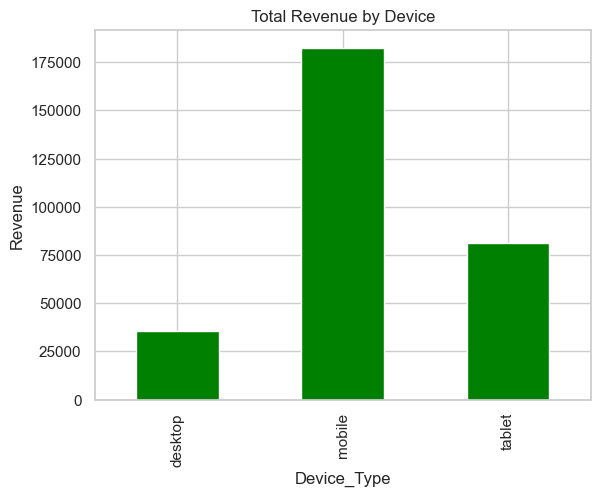

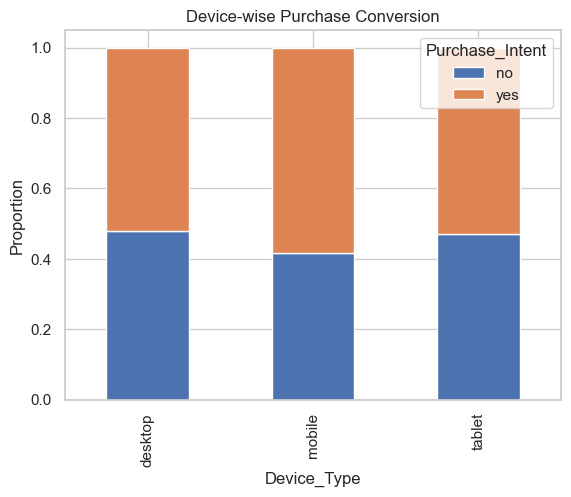

In [196]:

# Total revenue by device
df.groupby('Device_Type')['Purchase_Amount'].sum().plot(kind='bar', color='green')
plt.title('Total Revenue by Device')
plt.ylabel('Revenue')
plt.show()

# Conversion rate by device
pd.crosstab(df['Device_Type'], df['Purchase_Intent'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Device-wise Purchase Conversion')
plt.ylabel('Proportion')
plt.show()


## 5. Are there differences between genders, age groups, or regions in purchase intent or amount?

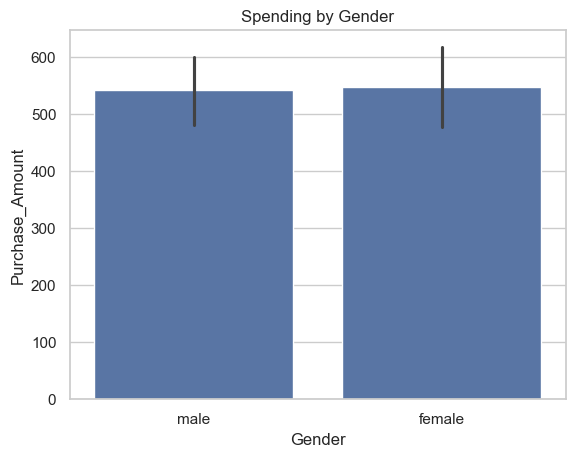

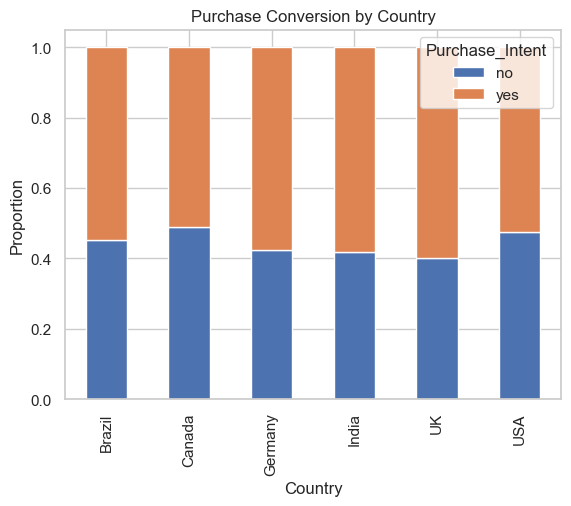

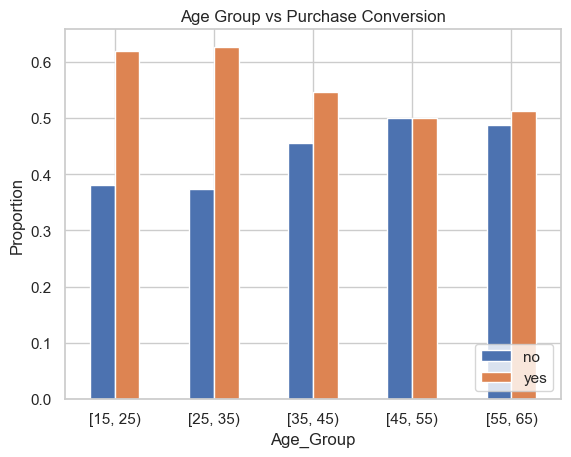

In [198]:

# Spending by Gender
sns.barplot(x='Gender', y='Purchase_Amount', data=df)
plt.title('Spending by Gender')
plt.show()

# Conversion by Country
pd.crosstab(df['Country'], df['Purchase_Intent'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Purchase Conversion by Country')
plt.ylabel('Proportion')
plt.show()

# Age group bins vs Purchase conversion
df['Age_Group'] = pd.cut(df['Age'], bins=[15,25,35,45,55,65],right=False)           #right - Changes the inclusivity and exclusivity
pd.crosstab(df['Age_Group'], df['Purchase_Intent'], normalize='index').plot(kind='bar', stacked=False)
plt.title('Age Group vs Purchase Conversion')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()


## 6. Is our marketing equally effective across different segments?

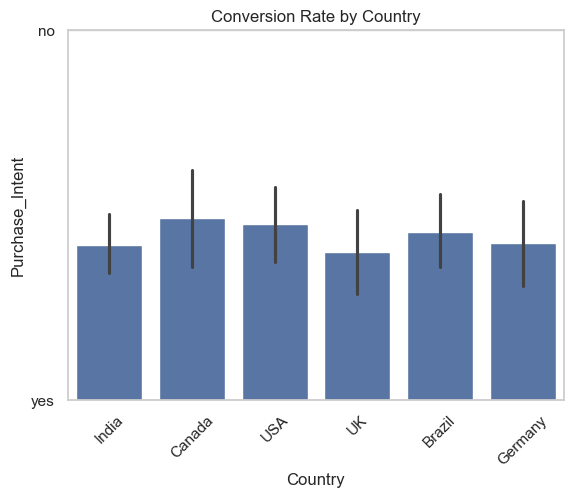

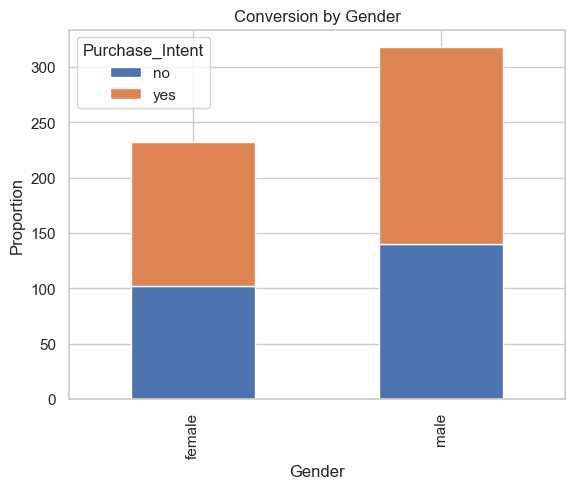

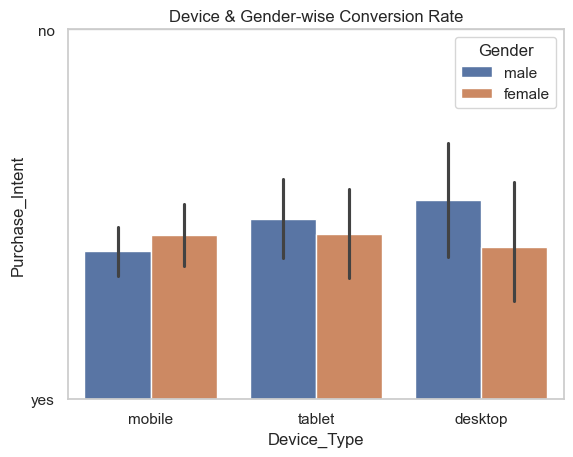

In [200]:

# Conversion by Region
sns.barplot(x='Country', y='Purchase_Intent', data=df)
plt.ylim(0,1)
plt.title('Conversion Rate by Country')
plt.xticks(rotation=45)
plt.show()

# Conversion by Gender
pd.crosstab(df['Gender'], df['Purchase_Intent']).plot(kind='bar', stacked=True)
plt.title('Conversion by Gender')
plt.ylabel('Proportion')
plt.show()

# Conversion by Device and Gender
sns.barplot(x='Device_Type', y='Purchase_Intent', hue='Gender', data=df)
plt.ylim(0,1)
plt.title('Device & Gender-wise Conversion Rate')
plt.show()


## 7. Correlation Analysis (Multivariate)

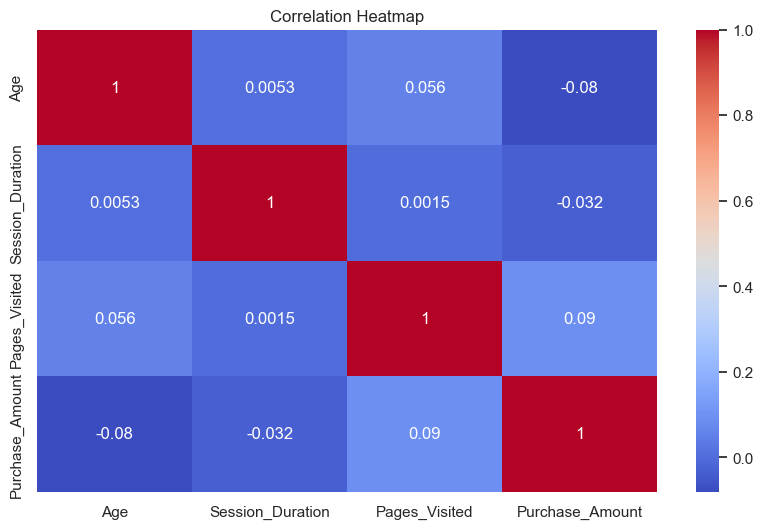

In [44]:

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [45]:
df.isnull().sum()

User_ID               0
Age                   0
Gender                0
Country               0
Session_Duration      0
Pages_Visited         0
Product_Category      0
Purchase_Intent       0
Purchase_Amount       0
Device_Type           0
Signup_Date         364
Last_Login           52
Age_Group             0
dtype: int64

## Prescriptive Analysis

(Example)
##### Target Audience-	Focus on 35–55 age group and the gender with higher conversion.
##### Device Optimization	Prioritize mobile UX and use mobile-exclusive promos.
##### Product Focus-	Push high-ticket and high-conversion categories.
##### Behavioral Segmentation-	Segment based on age, gender, device for personalized marketing.
##### Revenue Growth-	Use cross-sell, upsell, and personalized bundles.
##### Conversion Boost-	Investigate low-performing segments for improvements in UX, price, or CTAs.